In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTEENN
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# check if any null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# check if any duplicate values
df.duplicated().sum()

0

In [8]:
from ydata_profiling import ProfileReport
prof=ProfileReport(df)
prof.to_file(output_file='output.html') 

C:\Users\Admin\anaconda3\Lib\site-packages\ydata_profiling\profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
# removing customerId from dataset
df1=df.iloc[:,1:]
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [10]:
#converting total charges in numeric
df1['TotalCharges'] = pd.to_numeric(df1.TotalCharges, errors='coerce')


Text(0.5, 1.02, 'Count of TARGET Variable per category')

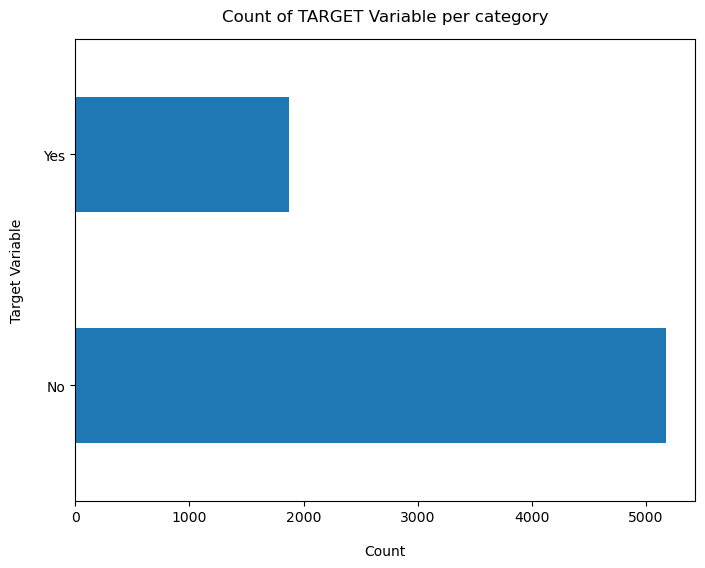

In [11]:
df1['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02)

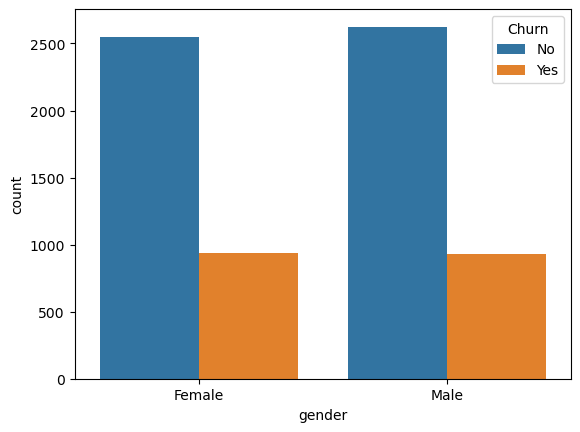

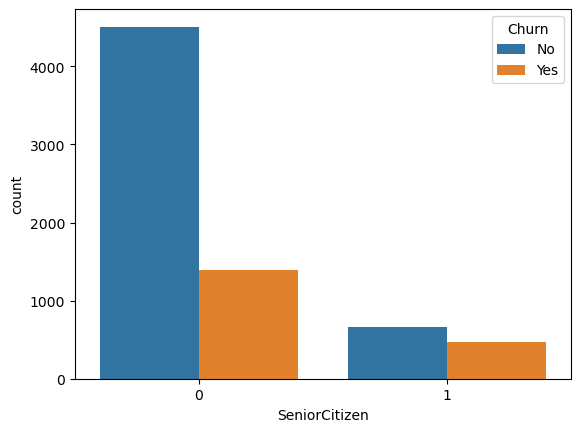

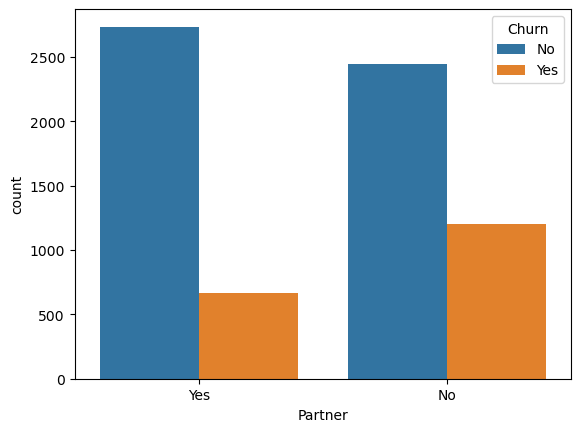

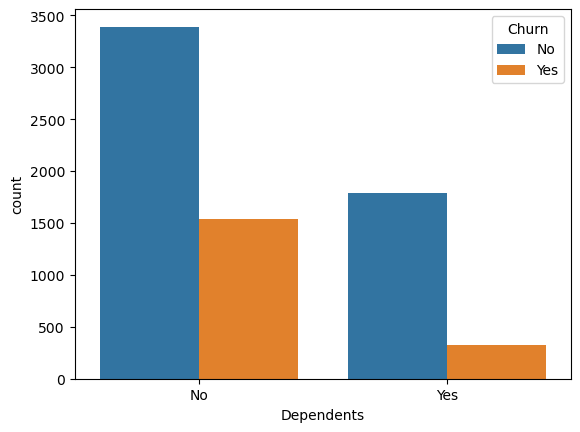

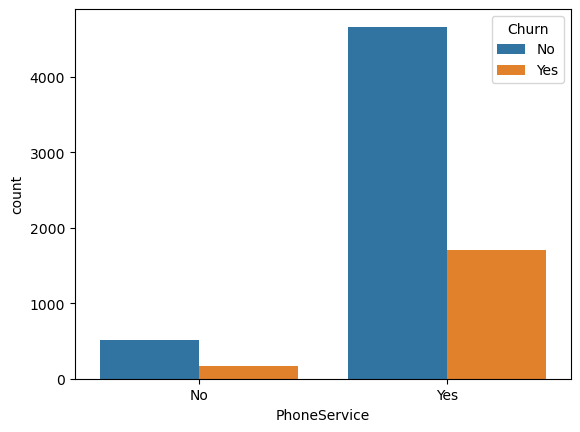

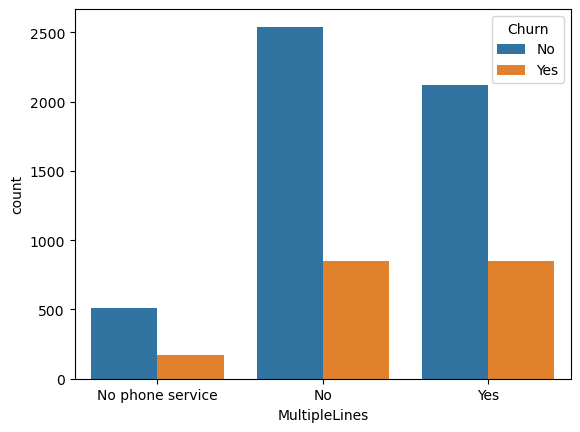

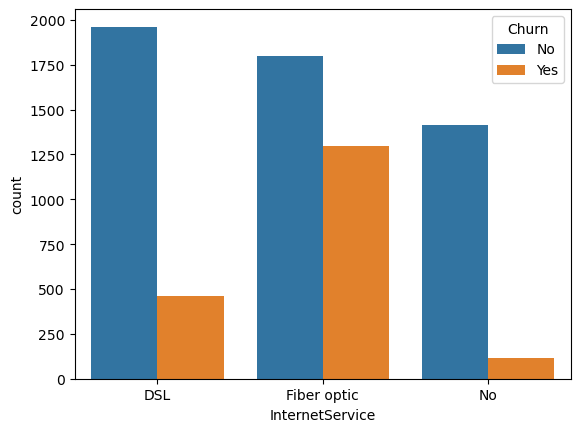

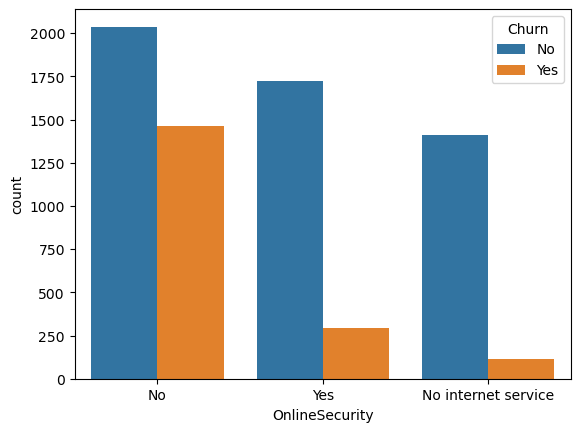

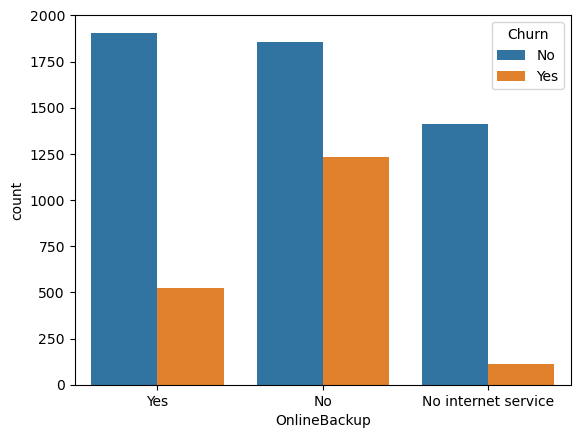

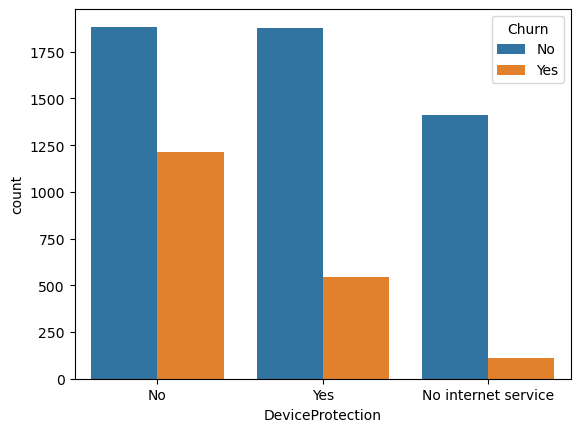

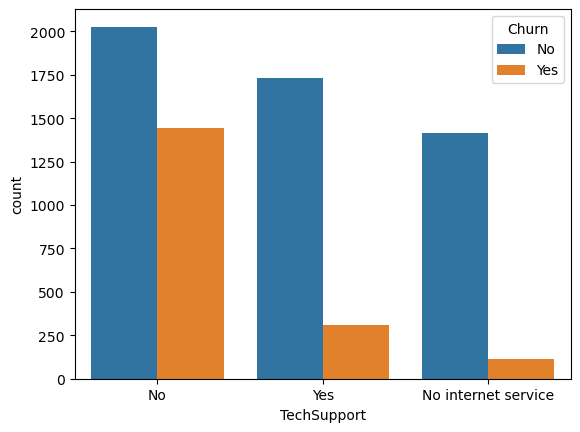

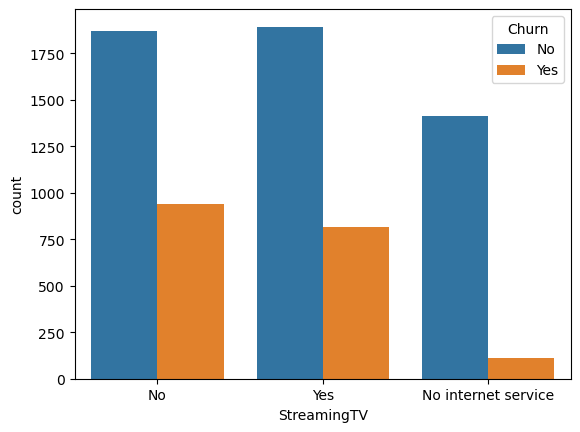

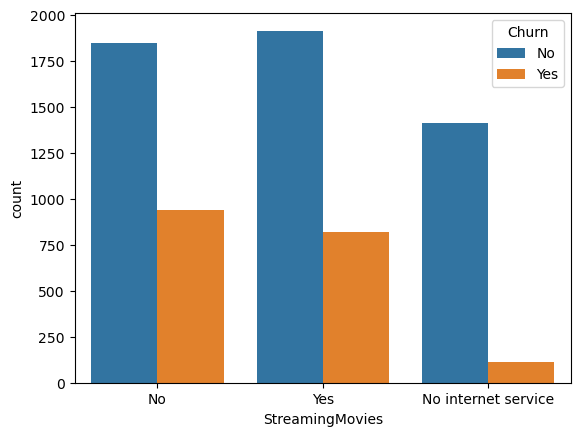

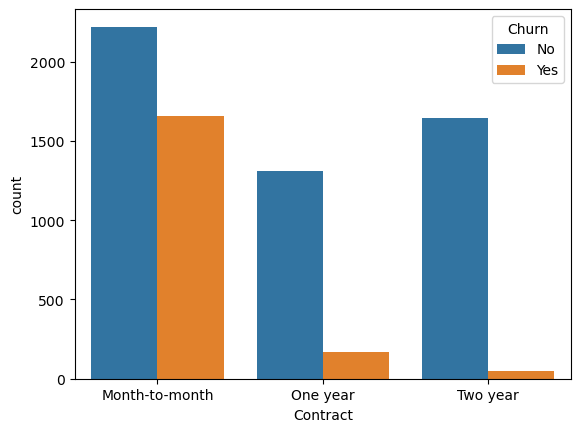

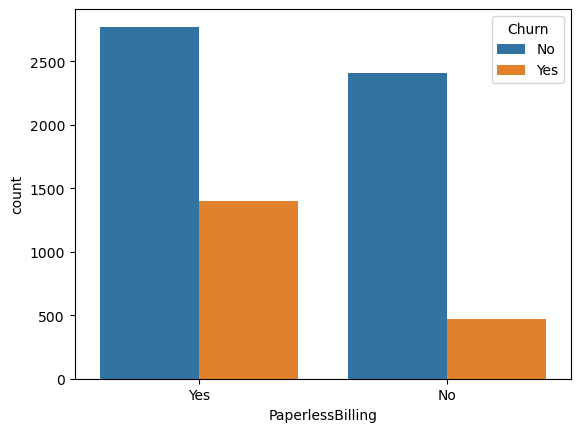

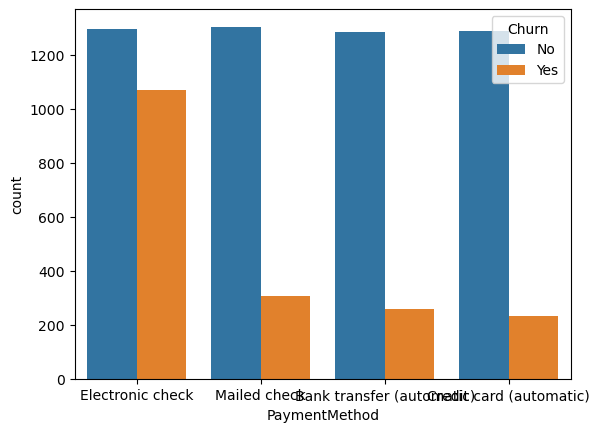

In [12]:
import seaborn as sns
for i, predictor in enumerate(df1.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges','tenure'])):
    plt.figure(i)
    sns.countplot(data=df1, x=predictor, hue='Churn')


In [13]:
#Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0
df1['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df1['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [14]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [15]:
#Let's convert all the categorical variables into dummy variables
df1_dummies = pd.get_dummies(df1, dtype = int)
df1_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


<Axes: >

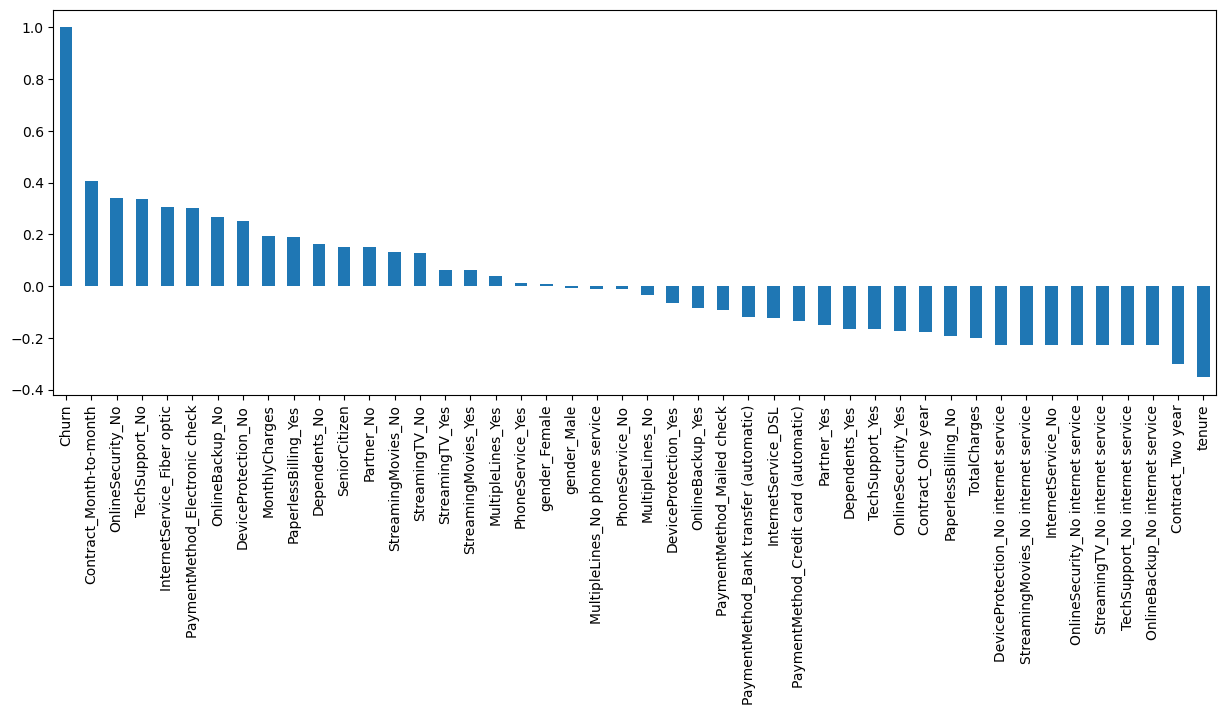

In [16]:
# correlation with churn
plt.figure(figsize=(15,5))
df1_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

<Axes: >

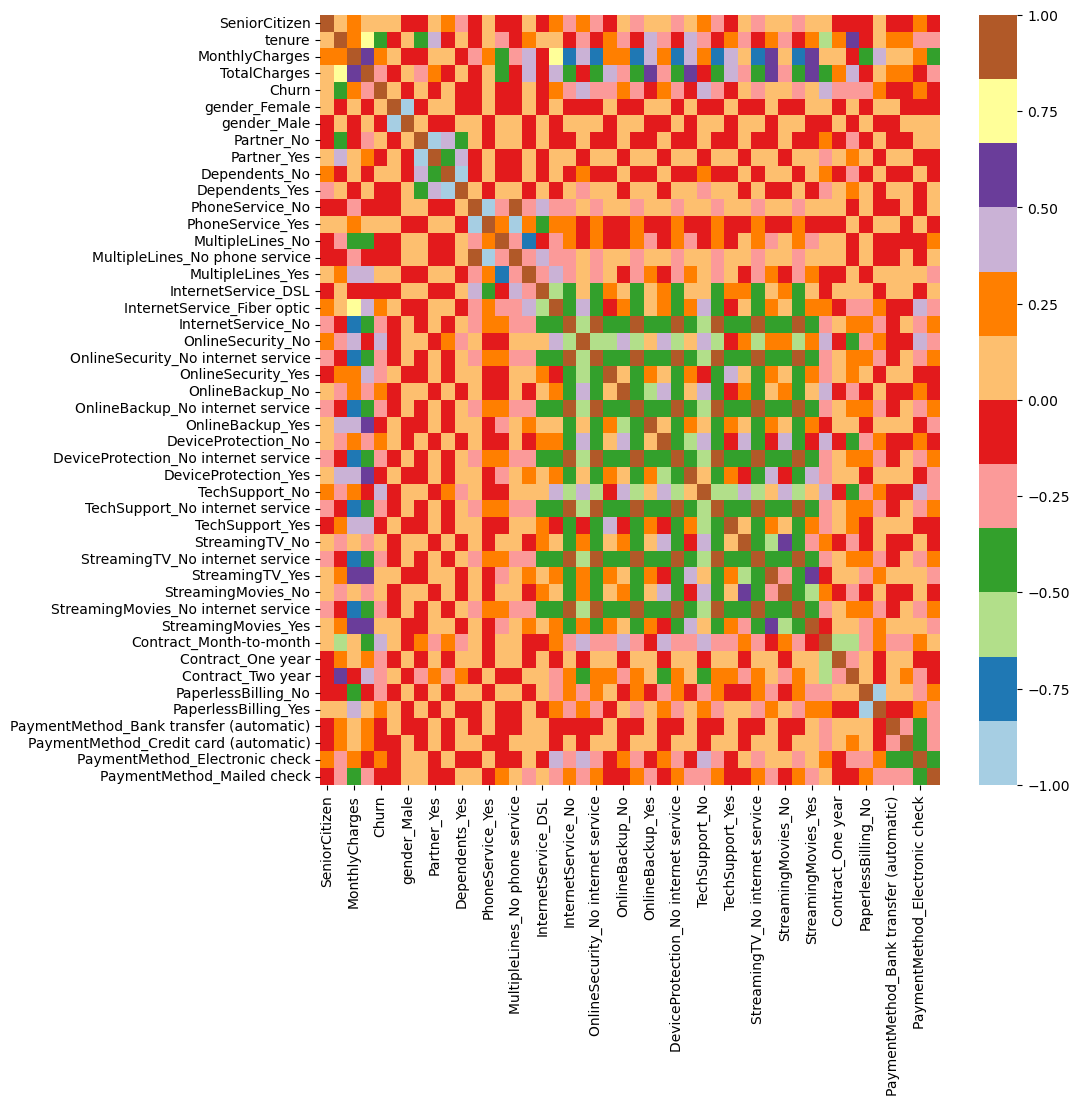

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(df1_dummies.corr(), cmap='Paired')

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

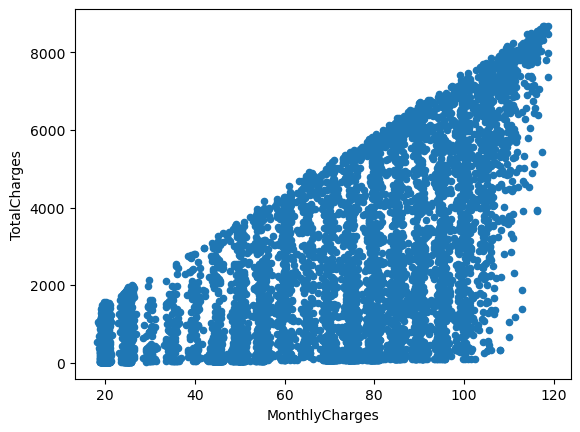

In [18]:
# Relationship between Monthly Charges and Total Charges
df1[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges')
#Total Charges increase as Monthly Charges increase - as expected.

Text(0.5, 1.0, 'Monthly charges by churn')

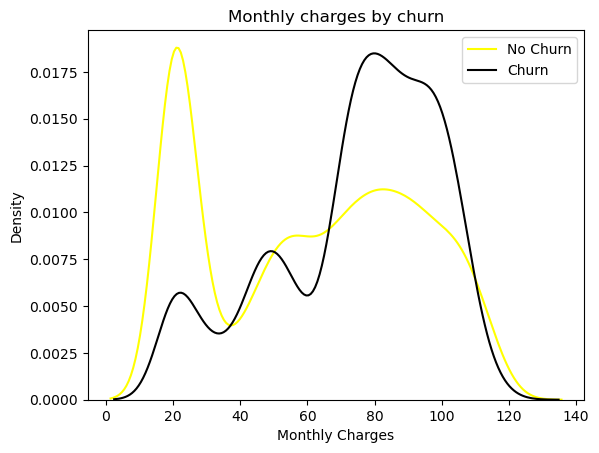

In [19]:
#Churn by Monthly Charges and Total Charges
import seaborn as sns
a = sns.kdeplot(df1_dummies.MonthlyCharges[(df1_dummies["Churn"] == 0) ],color="yellow")
a = sns.kdeplot(df1_dummies.MonthlyCharges[(df1_dummies["Churn"] == 1) ], color="Black")
a.legend(["No Churn","Churn"],loc='upper right')
a.set_ylabel('Density')
a.set_xlabel('Monthly Charges')
a.set_title('Monthly charges by churn')
# churn is high when monthy charges are high

Text(0.5, 1.0, 'Total charges by churn')

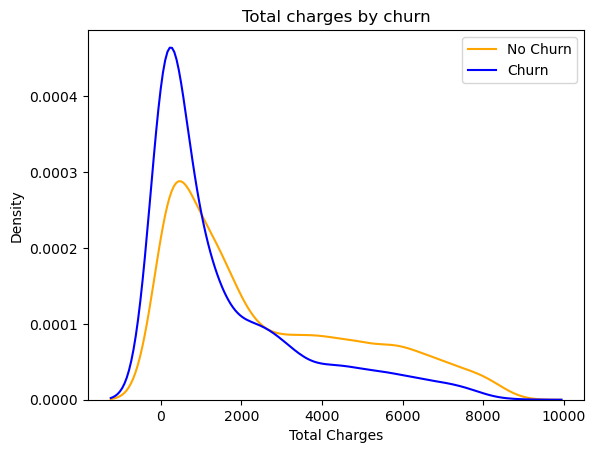

In [20]:
#**Surprising insight ** as higher Churn at lower Total Charges

#However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear 
#:- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz Higher Monthly Charge,
#Lower tenure and Lower Total Charge are linkd to High Churn.
b = sns.kdeplot(df1_dummies.TotalCharges[(df1_dummies["Churn"] == 0) ],color="orange")
b = sns.kdeplot(df1_dummies.TotalCharges[(df1_dummies["Churn"] == 1) ], color="Blue")
b.legend(["No Churn","Churn"],loc='upper right')
b.set_ylabel('Density')
b.set_xlabel('Total Charges')
b.set_title('Total charges by churn')

In [21]:
new_df1=df1.loc[df1["Churn"]==1]
new_df2=df1.loc[df1["Churn"]==0]

<Axes: xlabel='Partner', ylabel='count'>

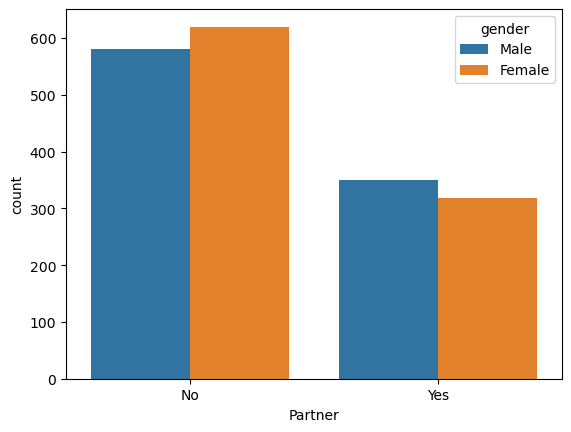

In [22]:
sns.countplot(new_df1,x='Partner',hue='gender')
#Distribution of Gender for Churned Customers

<Axes: xlabel='Partner', ylabel='count'>

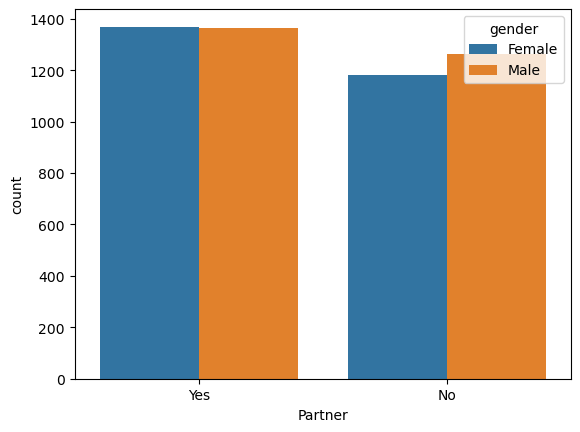

In [23]:
sns.countplot(new_df2,x='Partner',hue='gender')
#Distribution of Gender for non Churned Customers

<Axes: xlabel='PaymentMethod', ylabel='count'>

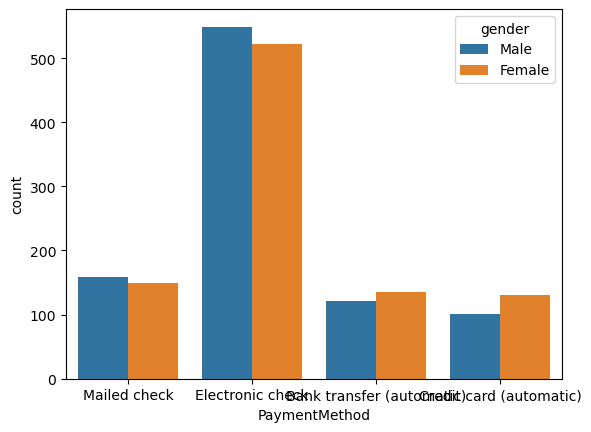

In [24]:
sns.countplot(new_df1,x='PaymentMethod',hue='gender')
#Distribution of paymentmethod for Churned Customers

<Axes: xlabel='SeniorCitizen', ylabel='count'>

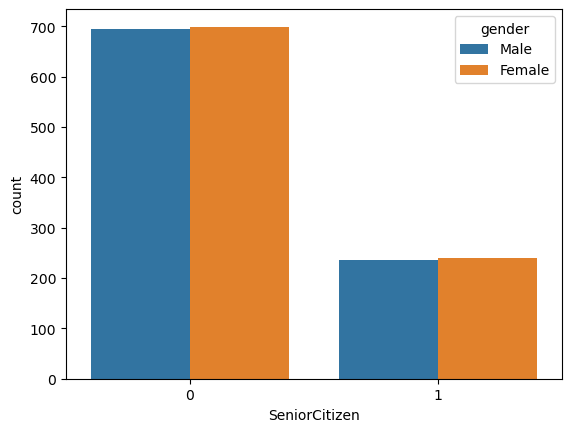

In [25]:
sns.countplot(new_df1,x='SeniorCitizen',hue='gender')
#Distribution of SeniorCitizen for Churned Customers

<Axes: xlabel='TechSupport', ylabel='count'>

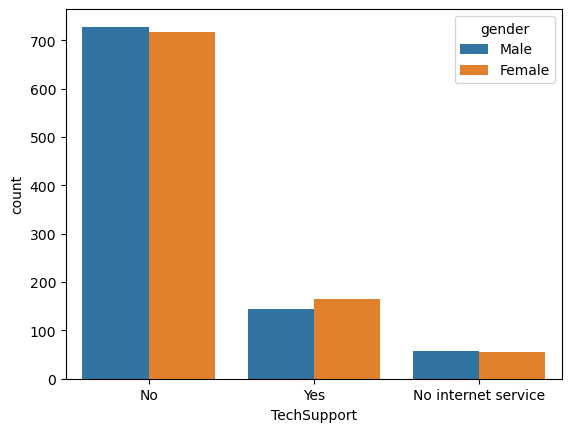

In [26]:
sns.countplot(new_df1,x='TechSupport',hue='gender')
#Distribution of techsupport for Churned Customers

<Axes: xlabel='Contract', ylabel='count'>

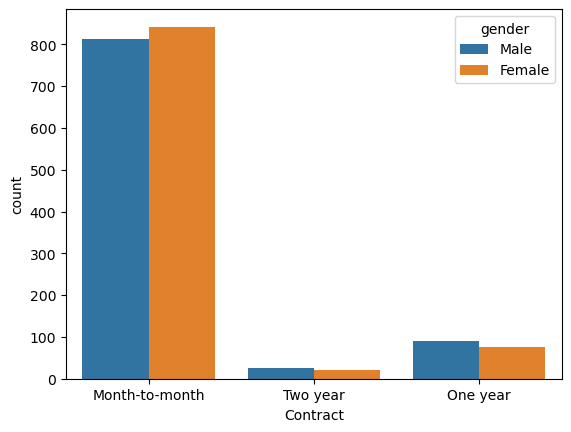

In [27]:
sns.countplot(new_df1,x='Contract',hue='gender')
#Distribution of contract for Churned Customers

In [28]:
df1_dummies.to_csv('churn_dataset.csv')

In [29]:
df = pd.read_csv('churn_dataset.csv')
df.head()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,29.85,29.85,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,1,0,34,56.95,1889.50,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,0,2,53.85,108.15,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
3,3,0,45,42.30,1840.75,0,0,1,1,0,...,0,0,1,0,1,0,1,0,0,0
4,4,0,2,70.70,151.65,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [30]:
df=df.drop('Unnamed: 0', axis = 1)

In [31]:
df.isnull().sum()

SeniorCitizen                               0
tenure                                      0
MonthlyCharges                              0
TotalCharges                               11
Churn                                       0
gender_Female                               0
gender_Male                                 0
Partner_No                                  0
Partner_Yes                                 0
Dependents_No                               0
Dependents_Yes                              0
PhoneService_No                             0
PhoneService_Yes                            0
MultipleLines_No                            0
MultipleLines_No phone service              0
MultipleLines_Yes                           0
InternetService_DSL                         0
InternetService_Fiber optic                 0
InternetService_No                          0
OnlineSecurity_No                           0
OnlineSecurity_No internet service          0
OnlineSecurity_Yes                

In [32]:
df.dropna(how= 'any', inplace=True)
df.isnull().sum()

SeniorCitizen                              0
tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
gender_Female                              0
gender_Male                                0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBack

In [33]:
X = df.drop('Churn',axis=1)
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [34]:
y = df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

Feature Selection

In [35]:
best_features = SelectKBest()
X = best_features.fit_transform(X,y)

In [36]:
# This will shows which feature are taken denoted as true
best_features.get_support()

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False,  True, False, False,  True, False, False,
        True, False, False, False, False, False, False,  True, False,
        True, False,  True, False, False, False, False,  True, False])

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

Decision Tree

In [38]:
model_1 = DecisionTreeClassifier(max_depth=6, min_samples_leaf = 8, random_state = 100)

In [39]:
model_1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [40]:
y_prediction=model_1.predict(X_test)
y_prediction

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [41]:
print(accuracy_score(y_prediction,y_test))

0.8052594171997157


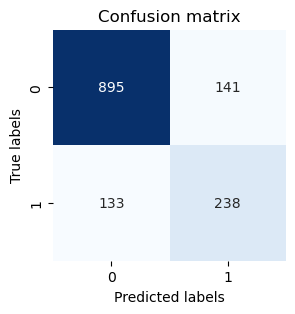

In [42]:
c = confusion_matrix(y_prediction,y_test)
plt.figure(figsize=(3,3))
sns.heatmap(c, annot=True, cmap='Blues', fmt='g',cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

In [43]:
print(classification_report(y_test, y_prediction, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1028
           1       0.64      0.63      0.63       379

    accuracy                           0.81      1407
   macro avg       0.75      0.75      0.75      1407
weighted avg       0.80      0.81      0.80      1407



Random Forest Classification

In [44]:
model_2 = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 100, max_depth = 6, min_samples_leaf=8)

In [45]:
model_2.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [46]:
y_pred = model_2.predict(X_test)

In [47]:
print(accuracy_score(y_pred,y_test))

0.8123667377398721


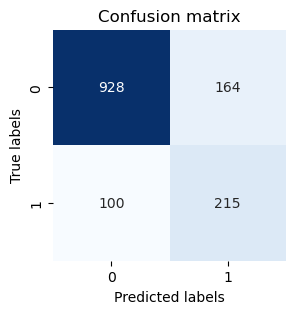

In [48]:
c = confusion_matrix(y_pred,y_test)
plt.figure(figsize=(3,3))
sns.heatmap(c, annot=True, cmap='Blues', fmt='g',cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

As we compare to the imbalance dataset our model are perform like okay not a better model to build for end to end project. So we need to over smpling data for reducing the TN, FN and increase the FP and TP for model building

# Using SMOTEENN for imbalance dataset

In [50]:
s=SMOTEENN()
X_train_sm,y_train_sm = s.fit_resample(X_train, y_train)
#print("The number of classes before fit {}".format(Counter(y_train)))
#print("The number of classes after fit {}".format(Counter(y_train_sm)))

In [51]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_train_sm, y_train_sm, test_size=0.2)

In [54]:
Dtc_sampling_model = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=7, min_samples_leaf=15)
Dtc_sampling_model.fit(X_train_new, y_train_new)
dtc_sampling_pred = Dtc_sampling_model.predict(X_test_new)

In [55]:
print(accuracy_score(dtc_sampling_pred,y_test_new))

0.9295612009237876


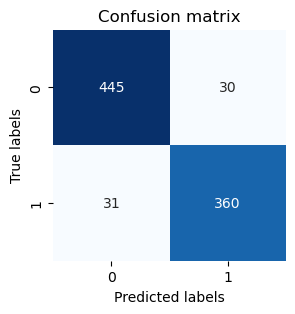

In [56]:
c = confusion_matrix(dtc_sampling_pred,y_test_new)
plt.figure(figsize=(3,3))
sns.heatmap(c, annot=True, cmap='Blues', fmt='g',cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

In [57]:
print(classification_report(dtc_sampling_pred , y_test_new, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       475
           1       0.92      0.92      0.92       391

    accuracy                           0.93       866
   macro avg       0.93      0.93      0.93       866
weighted avg       0.93      0.93      0.93       866



In [58]:
Random_forest_sampling = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 100, max_depth = 6, min_samples_leaf=8)
Random_forest_sampling.fit(X_train_new, y_train_new)
sampling_pred = Random_forest_sampling.predict(X_test_new)

In [59]:
print(accuracy_score(sampling_pred,y_test_new))

0.930715935334873


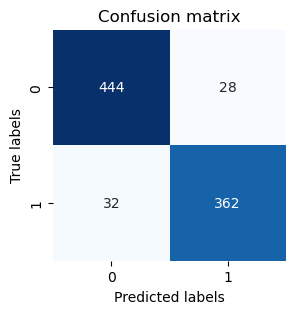

In [60]:
c = confusion_matrix(sampling_pred,y_test_new)
plt.figure(figsize=(3,3))
sns.heatmap(c, annot=True, cmap='Blues', fmt='g',cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

In [61]:
print(classification_report(sampling_pred , y_test_new, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       472
           1       0.93      0.92      0.92       394

    accuracy                           0.93       866
   macro avg       0.93      0.93      0.93       866
weighted avg       0.93      0.93      0.93       866



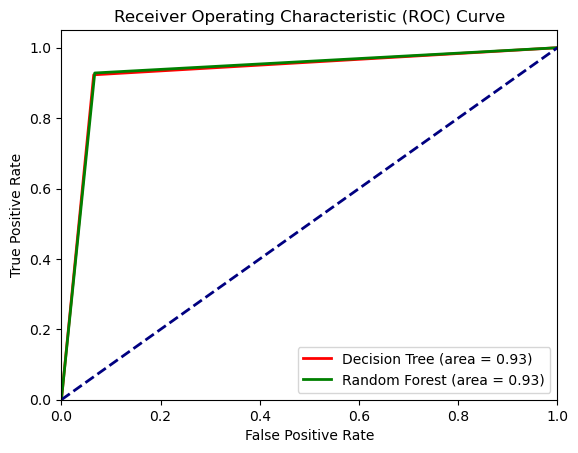

In [62]:
fpr, tpr, thresholds = roc_curve(y_test_new, dtc_sampling_pred)
fpr_1, tpr_1, thresholds_1 = roc_curve(y_test_new, sampling_pred)
#fpr_2, tpr_2, thresholds_2 = roc_curve(y_test_new, logreg_sampling)
roc_auc = auc(fpr, tpr)
roc_auc_1 = auc(fpr_1, tpr_1)
#roc_auc_2 = auc(fpr_2, tpr_2)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='Decision Tree (area = %0.2f)' % roc_auc)
plt.plot(fpr_1, tpr_1, color='green', lw=2, label='Random Forest (area = %0.2f)' % roc_auc_1)
#plt.plot(fpr_2, tpr_2, color='blue', lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc_2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()